<a href="https://colab.research.google.com/github/vishal-burman/PyTorch-Architectures/blob/master/research/modeling_AutoEncoder/test_sample_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! git clone https://github.com/vishal-burman/PyTorch-Architectures.git
%cd PyTorch-Architectures/research/modeling_AutoEncoder/

In [9]:
import time
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from model_ae import AutoEncoder

In [2]:
if torch.cuda.is_available():
  torch.backends.cudnn.deterministic = True

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cpu


In [4]:
# Hyperparameters
RANDOM_SEED = 123
LEARNING_RATE = 0.005
EPOCHS = 5
BATCH_SIZE = 256

In [10]:
# Architecture
num_features = 784
num_hidden_1 = 32

In [6]:
train_dataset = datasets.MNIST(root="data",
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
test_dataset = datasets.MNIST(root="data",
                              train=False,
                              transform=transforms.ToTensor())

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [13]:
# Sanity check
for images, labels in train_loader:
  print("Image Dimensions: ", images.shape)
  print("Label Dimensions: ", labels.shape)
  break

print("\nLength of Train Loader: ", len(train_loader))
print("Length of Test Loader: ", len(test_loader))

Image Dimensions:  torch.Size([256, 1, 28, 28])
Label Dimensions:  torch.Size([256])

Length of Train Loader:  235
Length of Test Loader:  40


In [ ]:
torch.manual_seed(RANDOM_SEED)
model = AutoEncoder(num_features=num_features, num_hidden_1=num_hidden_1)
model.to(device)

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [17]:
model.train()
start_time = time.time()
for epoch in range(EPOCHS):
  for idx, (features, targets) in enumerate(train_loader):
    features = features.view(features.size(0), -1)
    decoded = model(features)
    loss = F.binary_cross_entropy(decoded, features)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if idx % 50 == 0:
      print("Batch: %04d/%04d || Epoch: %04d/%04d || Loss: %.2f" % (idx, len(train_loader), epoch+1, EPOCHS, loss.item()))
  epoch_elapsed_time = (time.time() - start_time) / 60
  print("Epoch Elapsed Time: %.2f" % (epoch_elapsed_time))
total_training_time = (time.time() - start_time) / 60
print("Total Training Time: %.2f" % (total_training_time))

Batch: 0000/0235 || Epoch: 0001/0005 || Loss: 0.70
Batch: 0050/0235 || Epoch: 0001/0005 || Loss: 0.22
Batch: 0100/0235 || Epoch: 0001/0005 || Loss: 0.17
Batch: 0150/0235 || Epoch: 0001/0005 || Loss: 0.15
Batch: 0200/0235 || Epoch: 0001/0005 || Loss: 0.13
Epoch Elapsed Time: 0.11
Batch: 0000/0235 || Epoch: 0002/0005 || Loss: 0.13
Batch: 0050/0235 || Epoch: 0002/0005 || Loss: 0.11
Batch: 0100/0235 || Epoch: 0002/0005 || Loss: 0.11
Batch: 0150/0235 || Epoch: 0002/0005 || Loss: 0.11
Batch: 0200/0235 || Epoch: 0002/0005 || Loss: 0.10
Epoch Elapsed Time: 0.21
Batch: 0000/0235 || Epoch: 0003/0005 || Loss: 0.10
Batch: 0050/0235 || Epoch: 0003/0005 || Loss: 0.10
Batch: 0100/0235 || Epoch: 0003/0005 || Loss: 0.11
Batch: 0150/0235 || Epoch: 0003/0005 || Loss: 0.10
Batch: 0200/0235 || Epoch: 0003/0005 || Loss: 0.10
Epoch Elapsed Time: 0.32
Batch: 0000/0235 || Epoch: 0004/0005 || Loss: 0.10
Batch: 0050/0235 || Epoch: 0004/0005 || Loss: 0.10
Batch: 0100/0235 || Epoch: 0004/0005 || Loss: 0.09
Batch: 

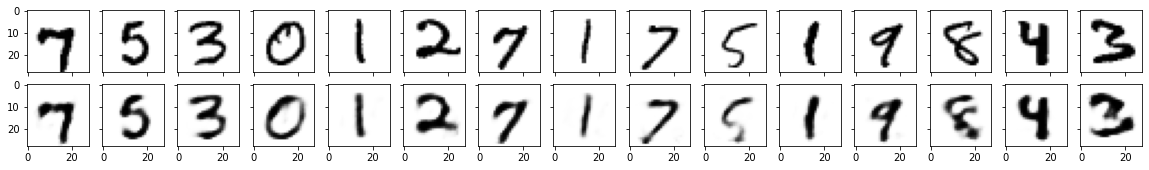

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

##########################
### VISUALIZATION
##########################

n_images = 15
image_width = 28

fig, axes = plt.subplots(nrows=2, ncols=n_images, 
                         sharex=True, sharey=True, figsize=(20, 2.5))
orig_images = features[:n_images]
decoded_images = decoded[:n_images]

for i in range(n_images):
    for ax, img in zip(axes, [orig_images, decoded_images]):
        curr_img = img[i].detach().to(torch.device('cpu'))
        ax[i].imshow(curr_img.view((image_width, image_width)), cmap='binary')